In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


[1.5488135  1.71518937 1.60276338] 1


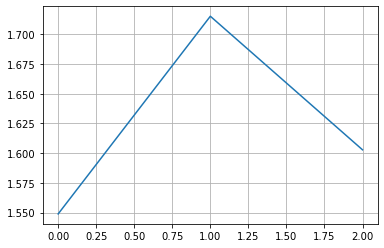

In [15]:
K = 3

np.random.seed(0)
μ = np.random.uniform(1, 2, K)
# σ = np.random.uniform(0.5, 1, K)
σ = 0.2 * np.ones(K)
print (μ, argmax(μ))


def bandit(k):
    return np.random.normal(μ[k], σ[k])

plot(μ)
grid()

In [3]:
### Random Policy ###########

T = 1000
U = list(range(K))

np.random.seed(0)
total_reward = 0

for t in range(T):
    # Random policy
    k = np.random.choice(U)
    
    reward = bandit(k)
    total_reward += reward
#     print (k, reward)
    
print(total_reward)

1624.3195519210383


# Random Policy ###########

In [4]:
### Greedy-Policy ###########
## Explore  T time steps and the exploit

T = 1000
U = list(range(K))

np.random.seed(0)
total_reward = 0

# action-reward function
Q = np.zeros(K)

N = 3  # number of exploration samples

for k in U:
    reward_k = []
    for _ in range(N):
        reward_k.append(bandit(k))
    
    Q[k] = np.mean(reward_k)
    
Q    

# best action 
print (Q, μ, argmax(Q))


for t in range(T- K*N):
#     # Random policy
#     k = np.random.choice(U)
    k = argmax(Q)
    reward = bandit(k)
    total_reward += reward
# #     print (k, reward)
    
print(total_reward)

[2.07263809 2.23705158 1.7186821 ] [1.5488135  1.71518937 1.60276338] 1
1673.6394917272946


### ϵ-Greedy-Policy ########### Storing rewards and actions

[0. 0. 0.] [1.5488135  1.71518937 1.60276338] 0
1615.4487057451163


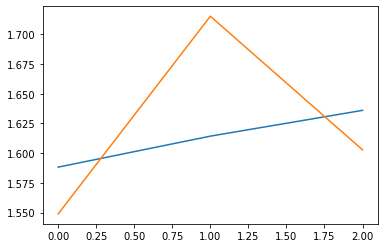

In [5]:

## Explore  T time steps and the exploit

T = 1000
U = list(range(K))
ϵ =  .1

np.random.seed(0)
total_reward = 0

# action-reward function
Q = np.zeros(K)

# Storage
S = {}

# best action 
print (Q, μ, argmax(Q))


for t in range(T):
    a = None
    if random.random() <= ϵ:
        # Explore
        a = np.random.choice(U)
    else:
        # Exploit
        a = argmax(Q)
    
    reward = bandit(a)
    total_reward += reward
    
    # Store
    if a in S:
        S[a].append(reward)
    else:
        S[a] =  [reward]
    
    # Update Q:
    Q[a] = np.mean(S[a])
    
    
print(total_reward)

plot(Q)
plot(μ)

# ϵ-Greedy-Policy: Incremental implementation

[0. 0. 0.] [1.5488135  1.71518937 1.60276338] 0
1615.4487057451163


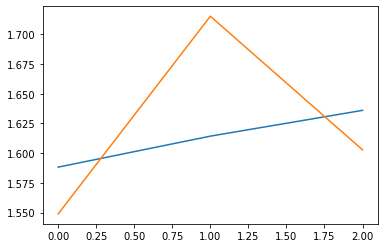

In [6]:
## Incremental implementation

### ϵ-Greedy-Policy ###########
## Explore  T time steps and the exploit

T = 1000
U = list(range(K))
ϵ =  .1

np.random.seed(0)
total_reward = 0

# action-reward function
Q = np.zeros(K)

# Storage
n = np.zeros_like(Q)

# best action 
print (Q, μ, argmax(Q))


for t in range(T):
    a = None
    if random.random() <= ϵ:
        # Explore
        a = np.random.choice(U)
    else:
        # Exploit
        a = argmax(Q)
    
    reward = bandit(a)
    total_reward += reward
    
    
    n[a] +=1
    # Update Q:
    Q[a] = Q[a] + (reward - Q[a]) / n[a] 
    
    
print(total_reward)

plot(Q)
plot(μ)



# Non-stationary problem

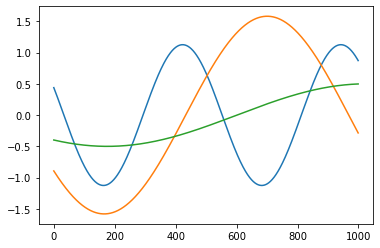

In [27]:
np.random.seed(1)
c1 = np.random.uniform(0.5, 2, K)
c2 = np.random.uniform(0.0, 0.04, K)
c3 = np.random.uniform(0.0, 2*pi, K)


μ = lambda t: c1 * np.cos(c2 * t + c3) 

μ_all = array([ μ(t) for t in range(T)])

plot(μ_all)

total reward =  596.7611469859914


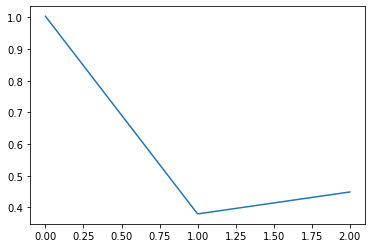

In [28]:
U = list(range(K))
ϵ =  .1

α = 0.5

np.random.seed(0)
total_reward = 0

# action-reward function
Q = np.zeros(K)

# Storage
n = np.zeros_like(Q)


def bandit(t, k):
    return np.random.normal(μ(t)[k], σ[k])

Q_time = []

time = array(range(T))
for t in time:
    a = None
    if random.random() <= ϵ:
        # Explore
        a = np.random.choice(U)
    else:
        # Exploit
        a = argmax(Q)
    
    reward = bandit(t, a)
    total_reward += reward
            

    # Update Q:  Equation (2.5)
    Q[a] = Q[a] + α * (reward - Q[a]) 
    
    Q_time.append(copy(Q))
    
print('total reward = ', total_reward)

plot(Q)

Q_time = array(Q_time).T

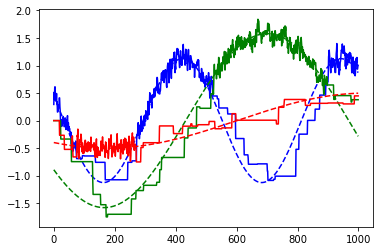

In [29]:
colors = ['b', 'g', 'r']
for a in U:
    plot(time, Q_time[a], colors[a])
    plot(time, μ_all.T[a], '--' + colors[a])